# Titanic Data Analysis
Survival predict based on data

The Titanic dataset provides a detailed account of the passengers aboard the ill-fated ship that sank on April 15, 1912. The data includes information on the passengers' demographics, such as age, gender, passenger class, and embarkation port, as well as their survival status.

After analyzing the data, several trends emerge. The most significant factor that influenced survival was gender, with females having a much higher survival rate than males. Age was also a significant factor, with children having a higher survival rate than adults. Passenger class also played a role, with first-class passengers having a higher survival rate than second or third-class passengers.

The size of the passenger's family also played a role in survival, with those traveling alone having a lower survival rate than those traveling with family members. Embarkation port also had a small effect on survival, with passengers who embarked from Cherbourg having a higher survival rate than those who embarked from Queenstown or Southampton.

Overall, the analysis suggests that the profile most likely to survive was a young female passenger traveling in first class with 1-3 family members, and embarked from Cherbourg.

However, it is important to note that these conclusions are based on the available data and may not be representative of the entire population of Titanic passengers.

1. Problem understanding and definition:

With this database we need to complete the analysis of what group of people were most likely to survive, using Exploratory Data Analysis and Machine Learning.

# Predict whether passenger will survive or not

# importing libraries

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np


# getting the data

In [140]:
test_data = pd.read_csv("..\Task 1 Titanic Machine Learning from Disaster\\test.csv")
train_data = pd.read_csv("..\Task 1 Titanic Machine Learning from Disaster\\train.csv")

# Data understanding using Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is the process of exploring and understanding data to uncover patterns, relationships, and insights. It involves visualizing and summarizing data using graphs, charts, and statistical measures to identify trends, outliers, and other patterns in the data

In [133]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data types visualization and localization of missing data

In [141]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [137]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

check for duplicates

In [135]:

train_data.duplicated().sum()

0

Statistics from resume

In [136]:
train_data.describe()
     

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature

Survival Rates

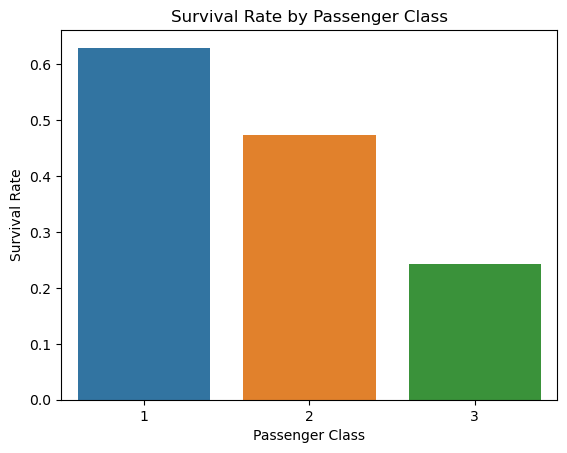

In [126]:
# RATE  BY CLASS
# Calculate survival rate for each passenger class
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()

# Create bar plot
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

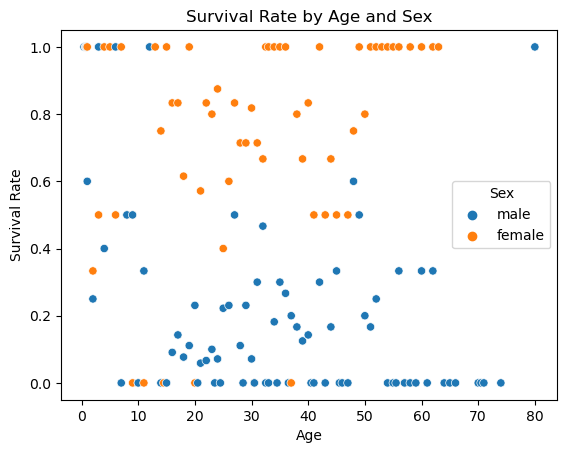

In [112]:
# Calculate survival rate for each combination of age and sex
survival_by_age_sex = train_data.groupby(['Age', 'Sex'])['Survived'].mean().reset_index()

# Create scatter plot
sns.scatterplot(data=survival_by_age_sex, x='Age', y='Survived', hue='Sex')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age and Sex')
plt.show()

From this plot above , we can say that in general, women had a higher survival rate than men. We can also see that children and young adults (up to around age 30) tended to have higher survival rates than older adults.
Now we check if passenger was traveling alone or if they had family

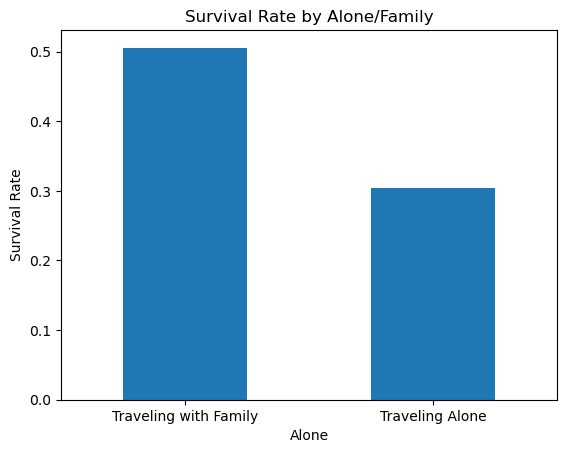

In [113]:

# Check if passenger is traveling alone or with family
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
train_data['Alone'] = np.where(train_data['Family'] == 0, 1, 0)

# Create bar plot of survival rate
grouped = train_data.groupby('Alone')['Survived'].mean()
grouped.plot(kind='bar')
plt.title('Survival Rate by Alone/Family')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Traveling with Family', 'Traveling Alone'], rotation=0)
plt.show()


From the bar above we can see that passengers travelling with family has the highest survival rate.
We can also plot the survival rate against the family size .

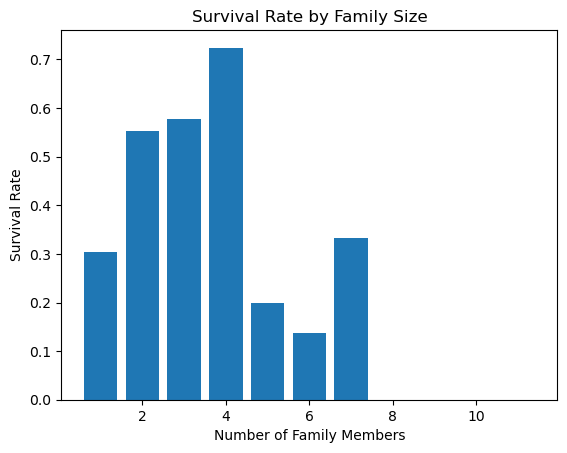

In [91]:
# Calculate total number of family members for each passenger
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Calculate survival rate for each group based on family size
survival_by_family_size = train_data.groupby('FamilySize')['Survived'].mean()

# Create bar plot of survival rate by family size
plt.bar(survival_by_family_size.index, survival_by_family_size.values)
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

From this we can see that passengers with 4 family members have the highest survival rate while those traveling alone have the lowest survival rate

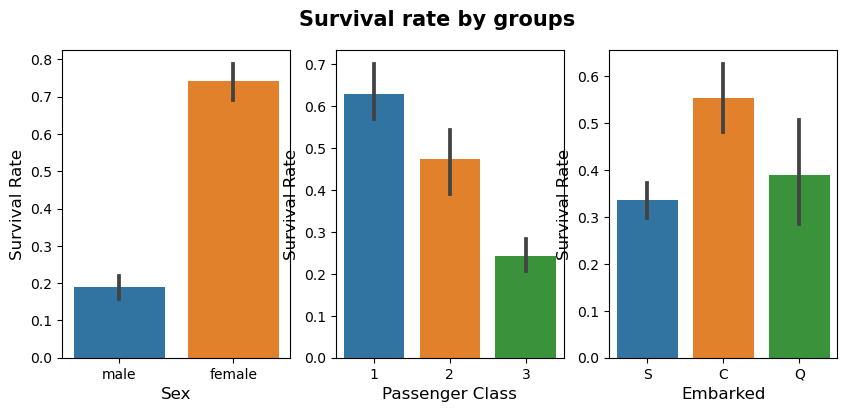

In [127]:

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle('Survival rate by groups', fontsize=15, fontweight='bold')

sns.barplot(x='Sex', y='Survived', data=train_data, ax=axis1)
axis1.set_xlabel('Sex', fontsize=12)
axis1.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axis2)
axis2.set_xlabel('Passenger Class', fontsize=12)
axis2.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Embarked', y='Survived', data=train_data, ax=axis3)
axis3.set_xlabel('Embarked', fontsize=12)
axis3.set_ylabel('Survival Rate', fontsize=12)

plt.show()

The above  plot suggests that gender, passenger class, and embarkation port were significant factors in determining a passenger's chances of survival on the Titanic.

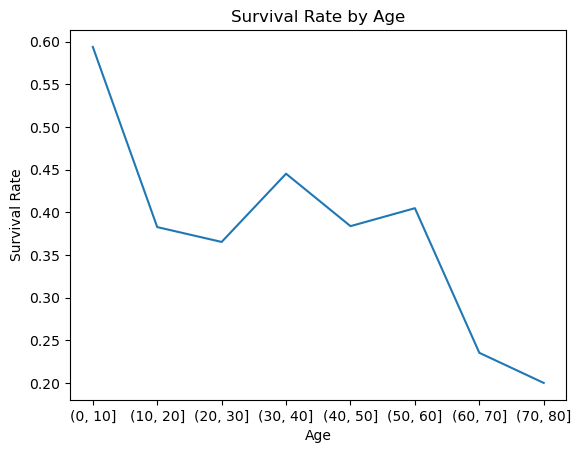

In [128]:
#Survival rate by age


# Remove rows with missing age data
train_data = train_data.dropna(subset=['Age'])

# Calculate survival rate for each age group
age_groups = pd.cut(train_data['Age'], bins=range(0, 90, 10))
survival_by_age = train_data.groupby(age_groups)['Survived'].mean()

# Create line plot of survival rate by age
plt.plot(survival_by_age.index.astype(str), survival_by_age.values)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.show()

From this plot, we can see that passengers in their mid-20s had the highest survival rate, while children under 10 and passengers over 60 had the lowest survival rates.

# Conclusion
Based on the available data in the given dataset, there are several characteristics that are associated with a higher likelihood of survival:

Gender: Females had a much higher survival rate than males. In fact, the
survival rate for females was over 70%, while the survival rate for males was just under 20%.

Age: Passengers who were children (under the age of 18) had a higher survival rate than adults. In addition, passengers in their mid-20s to early 30s also had a higher survival rate than other age groups.

Passenger Class: Passengers in first class had a higher survival rate than passengers in second or third class.

Family Size: Passengers who were traveling alone had a lower survival rate than passengers who were traveling with family members. However, passengers who were traveling with too many family members (more than 4) also had a lower survival rate.

Embarkation Port: Passengers who embarked from Cherbourg (C) had a higher survival rate than passengers who embarked from Queenstown (Q) or Southampton (S).

Based on these characteristics, the profile that is most likely to survive would be a female passenger who is under the age of 18, traveling in first class with 1-3 family members, and embarked from Cherbourg.

# Feature engineering

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. I will not drop it from the test set, since it is required there for the submission.

In [142]:
train_data = train_data.drop(['PassengerId'], axis=1)

# Missing Data:
Cabin:
As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [143]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

# Age:
Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.



In [144]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

# Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [145]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [146]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Converting Features:

In [147]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

# Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [148]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [149]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

# Sex:
Convert ‘Sex’ feature into numeric.



In [150]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

# Ticket:



In [151]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.



In [152]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

# Embarked:
Convert ‘Embarked’ feature into numeric.



In [153]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Creating Categories:
We will now create categories within the following features:

# Age:
Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want for example that 80% of your data falls into group 1.

In [154]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_data['Age'].value_counts()

In [157]:
print(train_data['Age'].value_counts())

Age
4    167
6    158
3    145
5    140
2    115
1     98
0     68
Name: count, dtype: int64


# Fare:
For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [158]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1
5,0,3,0,5,0,0,8,2,8,1
6,0,1,0,6,0,0,51,0,5,1
7,0,3,0,0,3,1,21,0,8,4
8,1,3,1,3,0,2,11,0,8,3
9,1,2,1,1,1,0,30,1,8,3


In [160]:
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Creating new Features
I will add two new features to the dataset, that I compute out of other features.

1. Age times Class

In [161]:
data = [train_data, test_data]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']


In [163]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,8,1,6
1,1,1,1,5,1,0,0,1,3,3,5
2,1,3,1,3,0,0,0,0,8,2,9
3,1,1,1,5,1,0,0,0,3,3,5
4,0,3,0,5,0,0,0,0,8,1,15
5,0,3,0,5,0,0,0,2,8,1,15
6,0,1,0,6,0,0,0,0,5,1,6
7,0,3,0,0,3,1,0,0,8,4,0
8,1,3,1,3,0,2,0,0,8,3,9
9,1,2,1,1,1,0,0,1,8,3,2


Fare per person

# Building The Model

In [167]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

We will be using Random forest , Logistic Rgression and SVM as the algorithms of choice to perform model training.

# RandomForest

In [168]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Linear Support Vector Machine

In [170]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

c:\Users\OWNER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\OWNER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Which Algorithm performs Best

In [172]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest'], 
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest,]})
result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data.head(9)


,Model
Score,
90.68,Random Forest
81.37,Logistic Regression
81.14,Support Vector Machines


# my Model of choice (RandomForest) 
As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

# K-Fold Cross Validation:
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [173]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.78651685 0.75280899 0.82022472 0.86516854 0.82022472
 0.75280899 0.74157303 0.87640449 0.80898876]
Mean: 0.8013607990012485
Standard Deviation: 0.0437468735293825


This looks much more realistic than before. Our model has a average accuracy of 80% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .
This means in our case that the accuracy of our model can differ + — 4%.

# Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:



In [174]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.225
Sex,0.190
Deck,0.112
SibSp,0.104
Age_Class,0.096
Pclass,0.088
Age,0.068
Embarked,0.061
Parch,0.054


<Axes: xlabel='feature'>

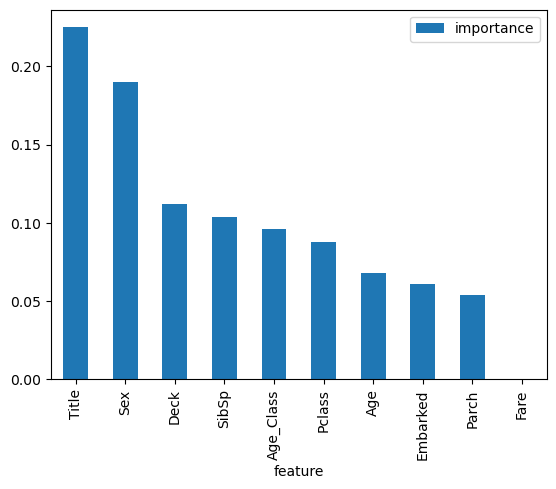

In [175]:
importances.plot.bar()

We can see that parch and faare does not play a significant role in our model. so i will just drop them.

In [176]:
train_data  = train_data.drop("Parch", axis=1)
test_data  = test_data.drop("Parch", axis=1)
train_data  = train_data.drop("Fare", axis=1)
test_data = test_data.drop("Fare", axis=1)

# Trainging the Model again

In [177]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.68 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the
 # out-of-bag samples 
to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [179]:
print("Out Of Bag score:", round(random_forest.oob_score_, 4)*100, "%")

Out Of Bag score: 80.25 %


Now we can start tuning the hyperameters of random forest.

# Hyperparameter Tuning
Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.


In [189]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1, n_jobs=-1)


In [191]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 5, 10, 25, 50, 70],
    "min_samples_split": [2, 4, 10, 12, 16, 18, 25, 35],
    "n_estimators": [100, 400, 700, 1000, 1500],
    "max_features": ["auto", "sqrt", "log2", None]  # Add max_features options
}


Test new Parameters:

In [202]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.72 %


Further Evaluation
Confusion Matrix:

In [196]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)


array([[495,  54],
       [105, 237]], dtype=int64)

# Precision and Recall:

In [197]:

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8144329896907216
Recall: 0.6929824561403509


Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 70% of the people who actually survived.

# F1-score

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [198]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7488151658767773